In [1]:
# imports
import sys
import pandas as pd
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import core_exp as cx
import core_calib as cal

In [2]:
params = {
    # exp
    "seed": 0,
    "exp_name": "trees",
    "cv_folds": 10,
    "plot": True,
    "calib_methods": ["RF", "RF_CT", "RF_fulldata", 
                      "Platt", "ISO", "Beta", "CRF","VA", "Line", "Rank", "Elkan", "tlr",
                      "RF_boot", 
                      "RF_ens_r", "RF_large",
                      "RF_ens_line", "RF_large_line",
                      "RF_ens_CRF", "RF_large_CRF",
                      "RF_ens_Platt", "RF_large_Platt",
                      "RF_ens_ISO", "RF_large_ISO",
                      "RF_ens_Beta", "RF_large_Beta"],
    "metrics": ["acc", "tce", "logloss", "brier", "ece", "auc"],
    
    #data
    "data_name": "synthetic",
    "data_size": 1000,
    "n_features": 2,

    "class1_mean_min":0, 
    "class1_mean_max":1,
    "class2_mean_min":1, 
    "class2_mean_max":3, 

    # calib param
    "bin_strategy": "quantile",
    "ece_bins": 20,
    "boot_size": 5000,
    "boot_count": 40,

    # RF hyper opt
    "hyper_opt": False,
    "depth": 4,
}
exp_key = "n_estimators"
exp_values = [1,2,3,4,5,10,20,50,100,200,500]

In [3]:
calib_results_dict, data_list = cx.run_exp(exp_key, exp_values, params)
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=True, 
                                    std=True)

In [ ]:
print(params["calib_methods"][tables["tce"].loc["Rank"].argmin()])
tables["tce"]

In [ ]:
print(params["calib_methods"][tables["brier"].loc["Rank"].argmin()])
tables["brier"]

In [ ]:
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=False, 
                                    std=True)

In [4]:
plot_calib_methods = params["calib_methods"].copy()
# plot_calib_methods.remove("Rank")
# plot_calib_methods.remove("Elkan")
# plot_calib_methods.remove("RF")
plot_calib_methods

['RF',
 'RF_CT',
 'RF_fulldata',
 'Platt',
 'ISO',
 'Beta',
 'CRF',
 'VA',
 'Line',
 'Rank',
 'Elkan',
 'tlr',
 'RF_boot',
 'RF_ens_r',
 'RF_large',
 'RF_ens_line',
 'RF_large_line',
 'RF_ens_CRF',
 'RF_large_CRF',
 'RF_ens_Platt',
 'RF_large_Platt',
 'RF_ens_ISO',
 'RF_large_ISO',
 'RF_ens_Beta',
 'RF_large_Beta']

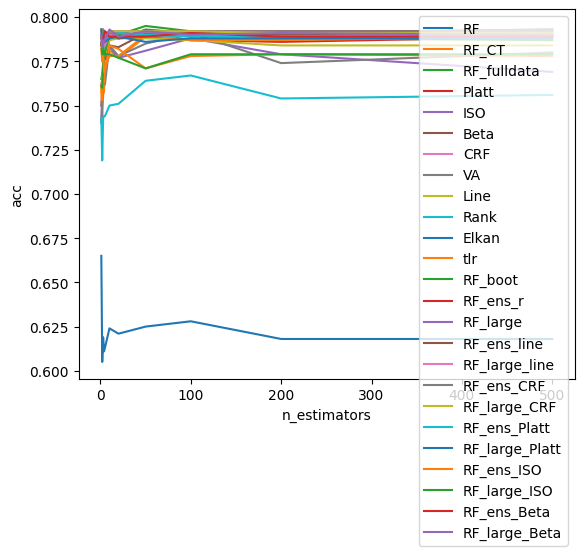

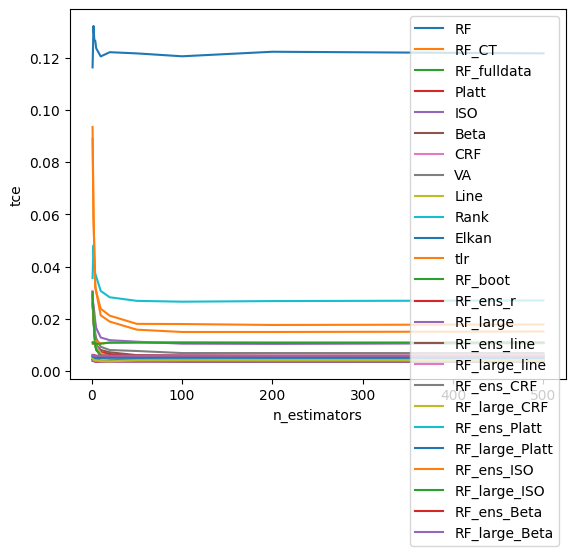

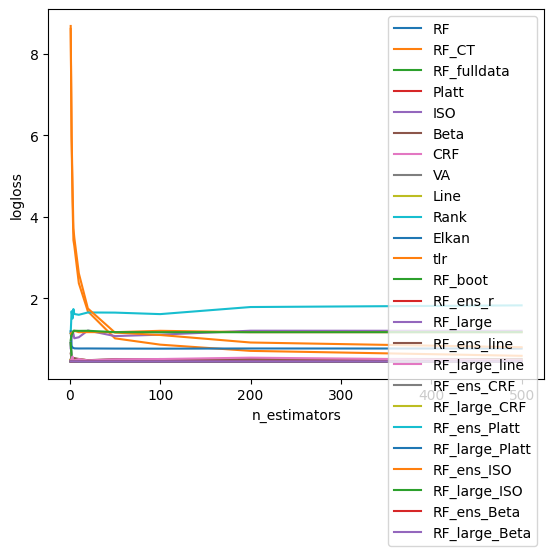

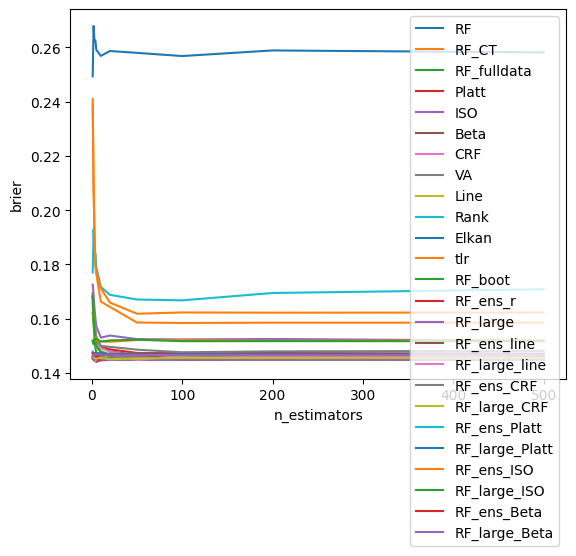

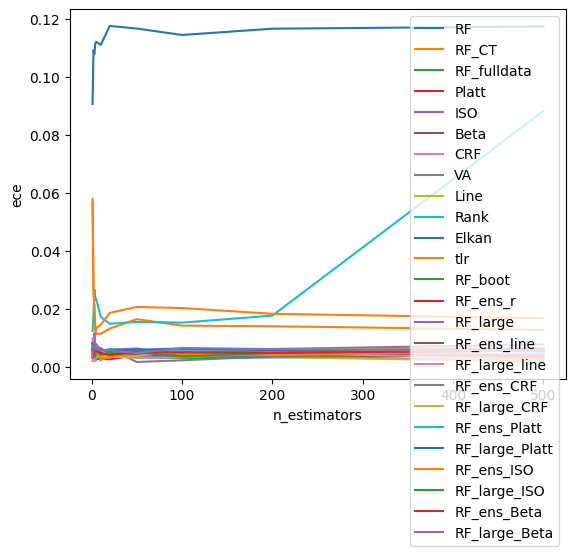

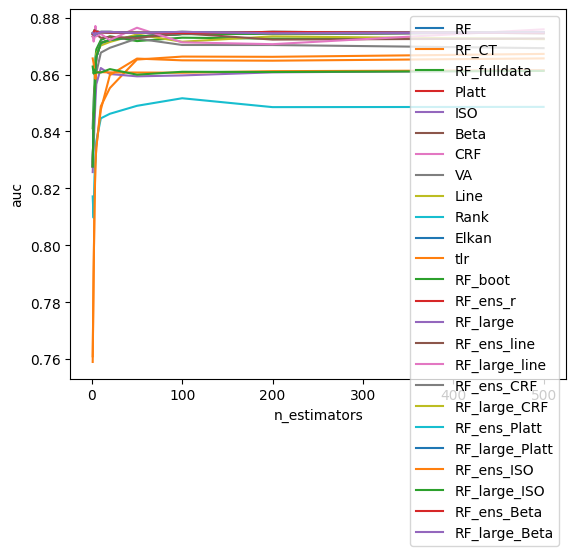

In [5]:
for metric in params["metrics"]:
    ax = tables[metric][plot_calib_methods].plot()
    ax.set_xlabel(exp_key)
    ax.set_ylabel(metric)